In [7]:
import numpy
import pickle
import tqdm
from easy_datetime.timestamp import TimeStamp

from finance_utils.electrical2.spot.probabilistic.forecast.power.data.meteo import OpenMeteoForecast,MeteoForecastMatrix
from finance_utils.electrical2.spot.probabilistic.forecast.power.data.tr import hourly_actual_power, day2day_hourly_forecast, non_stop_hourly_forecast
# from finance_utils.electrical2.spot.probabilistic.forecast.torch.transformer.vanilla2 import VanillaTransformer,vanilla_transformer_trainer2,vanilla_transformer_tester
from finance_utils.electrical2.spot.probabilistic.forecast.torch.transformer.vanilla_encoder import VanillaTransformerEncoder,vanilla_transformer_trainer2,vanilla_transformer_tester
from finance_utils.electrical2.spot.probabilistic.forecast.torch.normalization.basic import MinMax,ZScore

from private.db.tencnet.openmeteo.china_openmeteo_forecast3 import ProvinceForecastData,cma_new_energy_args, ecmwf_new_energy_args
from matplotlib import pyplot



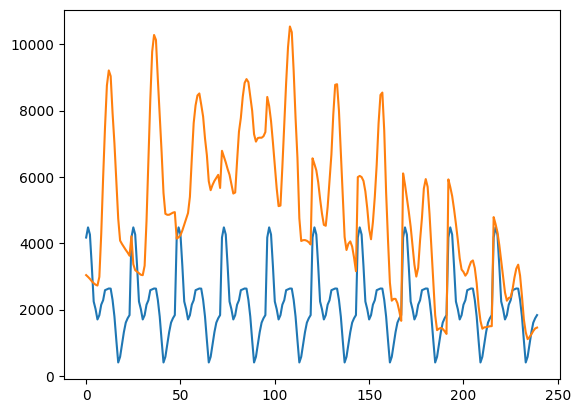

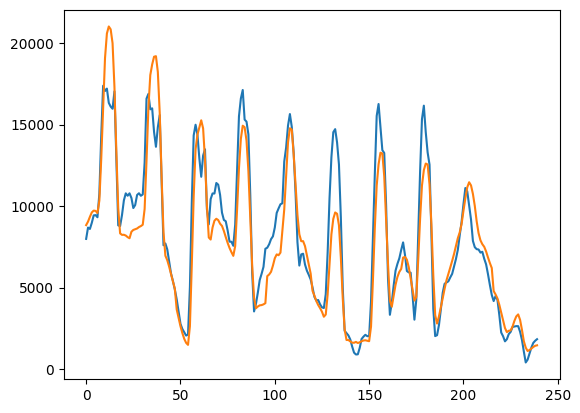

In [25]:
target = "2024-10-31"
tdate = TimeStamp(target)
train_days = 10

act = hourly_actual_power("shanxi", target, *TimeStamp.timestamp_range(
    tdate - ["day", train_days-1], tdate - ["day", 1], "day", 1, True
) )
hn_d2d = day2day_hourly_forecast("shanxi", tdate, train_days)
hn_ns = non_stop_hourly_forecast("shanxi", tdate, train_days)

pyplot.plot(act[-24:].tolist() * train_days)
pyplot.plot(hn_ns)
pyplot.show()
pyplot.plot(act)
pyplot.plot(hn_d2d)
pyplot.show()

In [19]:
with open(r"E:\code\github\private\private\db\tencnet\openmeteo\data\test_cma.pfd", "rb") as f:
    pfd: ProvinceForecastData = pickle.loads(f.read())
    
omf = OpenMeteoForecast(pfd)
x = omf.approaching_forecast(target, ["cma", "evening"])
m = MeteoForecastMatrix(m=x[0])
# print(m.norm_all(ZScore, cma_new_energy_args, 7))
print(m.grid_separate(cma_new_energy_args, 7)[0].tolist())
print(m.grid_separate(cma_new_energy_args, 7)[0].shape)

[[1729526400.0, 1729504800.0, 2024.0, 10.0, 22.0, 0.0, 1.0, 4.46, 2.3, 2.01, 3.86, 5.33, 8.39, 3.6, -0.8090169943749476, 0.3907311284892735, -0.9135454576426008, 0.45399049973954664, -0.9848077530122081, 0.9702957262759965, -0.9205048534524405, 0.8571673007021121, -0.9902680687415704, 1.0, -0.798635510047293, 43.0, 17.0, 91.0, 0.0, 0.0, 0.0, 0.0], [1729530000.0, 1729504800.0, 2024.0, 10.0, 22.0, 1.0, 1.0, 4.64, 2.02, 2.68, 5.89, 6.04, 9.04, 3.9, -0.8290375725550421, 0.4694715627858904, -0.8829475928589271, 0.656059028990507, -0.9848077530122081, 0.9455185755993165, -0.9135454576426008, 0.8571673007021121, -0.9961946980917455, 0.9135454576426009, -0.8090169943749476, 23.0, 32.0, 90.0, 0.0, 0.0, 0.0, 0.0], [1729533600.0, 1729504800.0, 2024.0, 10.0, 22.0, 2.0, 1.0, 4.82, 1.8, 3.31, 7.63, 6.44, 9.53, 4.0, -0.8571673007021123, 0.5299192642332047, -0.9135454576426008, 0.8480480961564254, -0.9848077530122081, 0.9205048534524399, -0.898794046299167, 0.8571673007021121, -0.9975640502598243, 0.9

In [27]:
mm = MeteoForecastMatrix(m.grid_separate(cma_new_energy_args, 7)[0])
# print(mm.norm_by_meteo_key(ZScore, cma_new_energy_args, 7).shape)
# mm.norm_by_meteo_key(ZScore, cma_new_energy_args, 7)
mm.matrix

array([[1.7295264e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7295300e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7295336e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7302932e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7302968e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7303004e+09, 1.7295048e+09, 2.0240000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [22]:
numpy.apply_along_axis(ZScore.f, axis=0, arr=m.grid_separate(cma_new_energy_args, 7)[0])

array([[-1.72005504,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ],
       [-1.70405453,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ],
       [-1.68805402,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ],
       ...,
       [ 1.68805402,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ],
       [ 1.70405453,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ],
       [ 1.72005504,  0.        ,  0.        , ..., -0.88119977,
        -0.76548826,  0.        ]])

In [24]:
numpy.apply_along_axis(ZScore.f, axis=0, arr=m.matrix)

array([[-1.72005504,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706],
       [-1.70405453,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706],
       [-1.68805402,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706],
       ...,
       [ 1.68805402,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706],
       [ 1.70405453,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706],
       [ 1.72005504,  0.        ,  0.        , ...,  0.        ,
        -0.19566164, -0.15975706]])